 **Before you start:** Please read the ***Submission*** section at the bottom of the notebook carefully.

# Explanatory questions
Answer the following questions with the help of the material learned in the classroom and the introduced book:



1. What is a test set, and why would you want to use it?

A test set is a separate(80%-20%common) and unseen set of data used to evaluate the performance of a machine learning model. It is used to assess how well the model generalizes to new data.also we  evaluate final model on the test data to get an estimate of the generalization.

2. What is the porpuse of a validation test?
The purpose of a validation test is to evaluate the performance of our machine learning model during the training and It is used to prevent overfitting by tuning the model's  hyperparameters.The validation test help us to selecting the best model and its parameters before finalizing the model's performance on a separate test dataset.



3. What can go wrong if you tune hyperparameters using the test set?
test set is for evaluating the model's performance, not for tuning the parameters so if we do this,it may lead to overfitting and our model does not work well for unseen data.
Also, we no longer have test data to evaluate the performance of our model.


# Machine Learning's "Hello World"!

This is the assignment **#1** of the **Machine Learning** graduate course at **Shahid Beheshti University - Fall 2023**

In this notebook, we explore the basic and traditional machine learning algorithms and see how to implement predictive models powered by [Sickit-Learn](https://scikit-learn.org/stable/) library.




In [63]:
# lets import the essential packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Medical Insurance Cost Prediction

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost:

- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight using the ratio of height to weight, ideally 18.5 to 24.9
- **smoker**: Smoking
- **children**: Number of children covered by health insurance / Number of dependents

In [64]:
#df = pd.read_csv('datasets/insurance.csv')
df = pd.read_csv('/content/insurance.csv')
print("Shape of the dataset: {}".format(df.shape))
#df.head(5)
print(df.head(5))


Shape of the dataset: (1338, 6)
   age     sex    bmi  children smoker     charges
0   45  female  27.83         2     no   8515.7587
1   24    male  32.70         0    yes  34472.8410
2   34  female  29.26         3     no   6184.2994
3   64    male  34.50         0     no  13822.8030
4   27  female  24.10         0     no   2974.1260


There is a library named `pandas_profiling` in Python include a method named as `ProfileReport()` which generate a basic report on the input DataFrame. The report consist of the following:

- DataFrame overview,
- Each attribute on which DataFrame is defined,
- Correlations between attributes (Pearson Correlation and Spearman Correlation), and
- A sample of DataFrame.

By running the cell below, a HTML file will be created next to the notebook in the project directory.

In [65]:
!pip install pandas-profiling


In [66]:
!pip install ydata_profiling

In [67]:
!pip install virtualenv
!virtualenv myenv
!myenv\Scripts\activate
!pip install ydata_profiling


created virtual environment CPython3.10.12.final.0-64 in 303ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==68.2.2, wheel==0.41.3
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
/bin/bash: line 1: myenvScriptsactivate: command not found


In [68]:
# import pandas_profiling library
import ydata_profiling as pp

# forming ProfileReport and save
# as a HTML file
profile = pp.ProfileReport(df)
profile.to_file("insurance_dataset_report.html")

ImportError: ignored

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')

## 1.1 Linear Regression

**Linear Regression** is a machine learning algorithm based on **supervised learning**. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.
<img src="images/linear-regression.png" width=400 height=400 />

In this problem, we want to create a linear regression model for the existing dataest. For simplicity, we only consider one of the features of the data `bmi` and the target `charges`. Also we are just interested in the people who smokes. So:

Text(0, 0.5, 'charges')

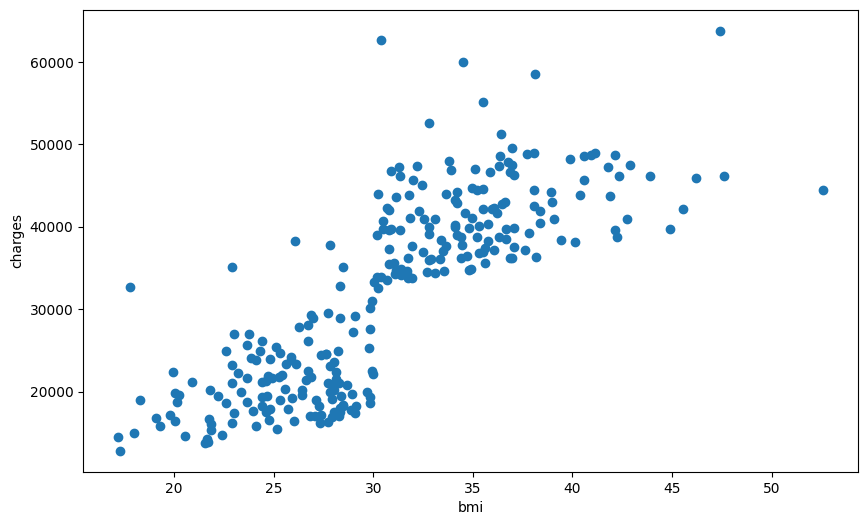

In [69]:
X = df[df['smoker'] =='yes']['bmi'].values  # X now is a numpy array
target = df[df['smoker'] =='yes']['charges'].values  # also target is a numpy array
y = target
# plot the points
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = X, y = target)
plt.xlabel("bmi")
plt.ylabel("charges")

## Q1. Implement `SimpleLinearRegression` class. (20 points)

Fill the blank lines with the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
class SimpleLinearRegression():
    def __init__(self):
        self.intercept = 0.0
        self.coeff = 0.0

    def train(self, X_train, y_train):

        linreg = LinearRegression()
        linreg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

         # prediction on test data
        train_pred = linreg.predict(X_train.reshape(-1, 1))
         # R squared value
        r2_train = metrics.r2_score(y_train, train_pred)
         #print("R2 score: ",(r2_train(y_train,train_pred)))
        test_pred = linreg.predict(X_test.reshape(-1, 1))

        """intercept = 0.0
        coeff = 0.0

        linreg = LinearRegression()
        linreg.fit(X_train.reshape(-1, 1), y_train)

        intercept = linreg.intercept_
        coeff = linreg.coef_[0]
        self.intercept = intercept
        self.coeff = coeff

        return coeff, intercept"""

        intercept = linreg.intercept_
        coeff = linreg.coef_[0]
        self.intercept = intercept
        self.coeff = coeff
        return coeff, intercept


    def compute_loss(self, y_pred, y_true, loss_fn = 'MSE'):
        # TODO: Implement this function that takes y_pred and y_true
        # as a 1-dimensional numpy array (n_samples,) and returns
        # the loss using sklearn.metrics functions

        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']

        loss = None
        if loss_fn == 'MSE':
            loss = metrics.mean_squared_error(y_true, y_pred)

        elif loss_fn == 'MAE':
            loss = metrics.mean_absolute_error(y_true, y_pred)

        elif loss_fn == 'R2_Score':

            loss = metrics.r2_score(y_true,y_pred)

        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return loss

    def normalize(self, X, normalization='Standardization'):

        possible_normalization = ['Standardization', 'MinMaxScaling']

        if normalization == 'Standardization':
            scaler = StandardScaler()
            normalized_feat = scaler.fit_transform(X)

        elif normalization == 'MinMaxScaling':
            scaler = StandardScaler()
            normalized_feat = (X - np.min(X)) / (np.max(X) - np.min(X))

        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return normalized_feat

    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):

        X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

        return X_train, y_train, X_test, y_test, StandardScaler

In [127]:
print(linreg.coef_, linreg.intercept_)

[[1479.77926155]] [-13667.51251072]


In [71]:
########### for understanding  ##########
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
linreg = LinearRegression()
linreg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
print(linreg.coef_, linreg.intercept_)
# prediction on training data
train_pred = linreg.predict(X_train.reshape(-1, 1))
# R squared value
r2_train = metrics.r2_score(y_train, train_pred)
#print("R2 score: ",(r2_train(y_train,train_pred)))
# prediction on test data
test_pred = linreg.predict(X_test.reshape(-1, 1))
r2_test = metrics.r2_score(y_test,test_pred)
print("R2 for train data:", r2_train)
print("R2 for test data:", r2_test)
# MSE
loss1 = metrics.mean_squared_error(y_test, test_pred)
print("MSE for test data:", loss1)
# MAE
loss2 = metrics.mean_absolute_error(y_test, test_pred)
print("MAE for test data:", loss2)


[[1479.77926155]] [-13667.51251072]
R2 for train data: 0.6842359273754612
R2 for test data: 0.5104532427811053
MSE for test data: 64126706.49257836
MAE for test data: 5905.831910153578


Text(0, 0.5, 'y_pred')

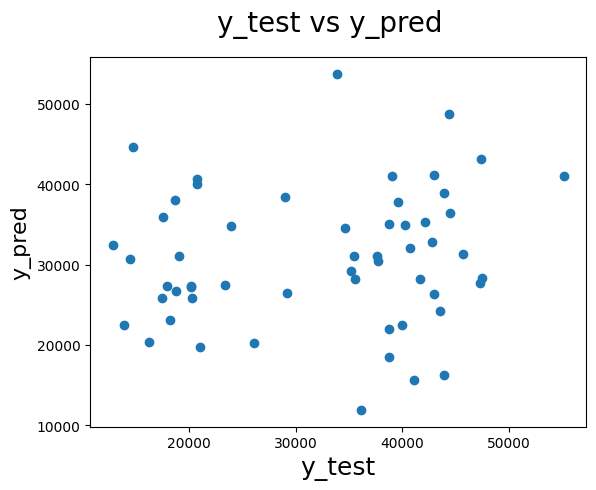

In [139]:
# Plotting y_test and y_pred to understand
fig = plt.figure()
plt.scatter(y_test, test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## Q2. What are the coefficient and intercept of the trained linear model? (5 points)

After completing the functions above, use them to report the final coefficient and intercept of the predicted model.

**Note**: When implementing the `SimpleLinearRegression` class, notice that before training your model, normalize your input features for better convergence by completeing `normalize()` function. If you forget it, it may hurts your model consequently!

In [133]:
slr = SimpleLinearRegression()
X = X.reshape(-1, 1)
X_normalized = slr.normalize(X,normalization='Standardization')
y = y.ravel()
#split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)
coeff, intercept = slr.train(X_train, y_train)
print(coeff)
print(intercept)



[1483.15751225]
[-13500.38254037]


## Q3. Plot the prediceted line and the data points. (5 points)

- Use `plt.scatter` to indicate the data points (Blue points for Train set and Red points for Test set).
- Plot the predicted line using the coefficient and intercept calculated in the previous question. (`plt.plot`)

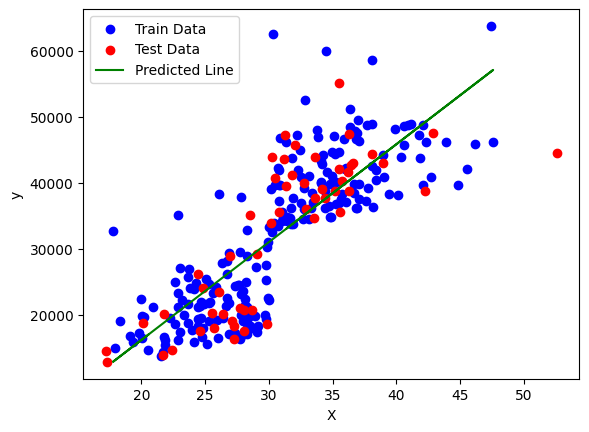

In [134]:

y_train_pred = intercept + coeff * X_train.flatten()
y_test_pred = intercept + coeff * X_test.flatten()

# Plotting the data points
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Plotting the predicted line
plt.plot(X_train, y_train_pred, color='green', label='Predicted Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

## Q4. Compute loss. (5 points)

First you must search about the following loss functions and compare them. (By showing their benefits to each other).

- **MSE**: Mean Squared Error : MSE:In the fields of regression analysis and machine learning, the Mean Square Error is a crucial metric for evaluating the performance of predictive models. It measures the average squared difference between the predicted and the actual target values within a dataset. The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth.
- **MAE**: Mean Absolute Error : MAE:the Mean Square Error is a crucial metric for evaluating the performance of predictive models. It measures the average squared difference between the predicted and the actual target values within a dataset. The primary objective of the MSE is to assess the quality of a model's predictions by measuring how closely they align with the ground truth.the MSE places a higher weight on larger errors, making it sensitive to outliers. A lower MSE indicates that the model's predictions are closer to the true values, reflecting better overall performance.
- **R2-score**
R2-Squared: (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
**Benefits:**
- **MSE:** Benefits from the squared term by penalizing larger errors more. It's sensitive to outliers.

- **MAE:** Benefits from being less sensitive to outliers, providing a more robust measure of average error.

- **R2 Score:** Benefits from being a normalized metric, providing a proportion of explained variance. It's easier to interpret, with 1 indicating a perfect fit.


Then create a DataFrame similar to the table shown below:

| loss_function | train_set | test_set |
| --- | --- | --- |
| MSE | ... | ... |
| MAE | ... | ... |
| R2-score | ... | ... |

In [135]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming you have predictions for both train and test sets
y_train_pred = intercept + coeff * X_train.flatten()
y_test_pred = intercept + coeff * X_test.flatten()

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create a DataFrame
metrics_data = {
    'Metric': ['MSE', 'MAE', 'R2 Score'],
    'Train Set': [mse_train, mae_train, r2_train],
    'Test Set': [mse_test, mae_test, r2_test]
}

metrics_df = pd.DataFrame(metrics_data)

# Print the DataFrame
print(metrics_df)


     Metric     Train Set      Test Set
0       MSE  4.578882e+07  4.884309e+07
1       MAE  5.146869e+03  5.379705e+03
2  R2 Score  6.557427e-01  6.286655e-01


## 1.2 Underfitting & Overfitting Issues

A model is said to be a good machine learning model if it generalizes any new input data from the problem domain in a proper way. This helps us to make predictions in the future data, that the data model has never seen. Now, suppose we want to check how well our machine learning model learns and generalizes to the new data (Test set). For that, we have overfitting and underfitting, which are majorly responsible for the poor performances of the machine learning algorithms.

- **Underfitting:** A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm **does not fit the data well enough**. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

    Techniques to reduce underfitting:

    1. Increase model complexity
    2. Increase the number of features, performing feature engineering
    3. Remove noise from the data.
    4. Increase the number of epochs or increase the duration of training to get better results.
    
    
- **Overfitting:** A statistical model is said to be overfitted when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models.

    Techniques to reduce overfitting:

    1. Increase training data.
    2. Reduce model complexity.
    3. Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training).
    4. Ridge Regularization and Lasso Regularization
    
    In the image below you can see linear regression and polynomial regression models. In the linear model, the model has underfitted and thus it cannot be generalized on all the data point properly (Underfitting). So we can add polynomial features as well to increase the complexity of the model. Therefore, in the middle figure you can see better fittnes of the model on the data points by adding $\{x^2, x^3, x^4\}$ to our hypothesis space.
Although in the right side figure you see less loss than others, but the model is overfitted. It cannot be generalized on the test set (unseen data).
    
<img src="images/underfitting_overfitting.png" width=700 height=700 />


**Note:** The image above is not related to the given `insurance.csv` dataset.

## Q5. Implement `PolynomialRegression` class. (15 points)

Fill the blank lines with using the least possible codes. Note that redundant codes may lead to reduce your score.

**Note**: Do not add any other functions to the class defined below.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np

class PolynomialRegression():
    def __init__(self, degree=3):
        self.degree = degree
        self.poly = PolynomialFeatures(degree= 3)

    def train(self, X_train, y_train):
        # Fit linear regression on polynomial features
        X_poly_train = self.poly.fit_transform(X_train.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Set intercept and coefficients
        intercept = model.intercept_
        coeff = model.coef_

        return coeff, intercept

    def compute_loss(self, y_pred, y_true, loss_fn='MSE'):
        # Compute loss using sklearn.metrics functions
        possible_loss_functions = ['MSE', 'MAE', 'R2_Score']
        loss = None

        if loss_fn == 'MSE':
            loss = metrics.mean_squared_error(y_true, y_pred)
        elif loss_fn == 'MAE':
            loss = metrics.mean_absolute_error(y_true, y_pred)
        elif loss_fn == 'R2_Score':
            loss = metrics.r2_score(y_true, y_pred)
        else:
            error_str = 'Loss function is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return loss

    def normalize(self, X, normalization='Standardization'):
        # Normalize input features
        possible_normalization = ['Standardization', 'MinMaxScaling']

        if normalization == 'Standardization':
            X_normalized = (X - np.mean(X)) / np.std(X)
        elif normalization == 'MinMaxScaling':
            X_normalized = (X - np.min(X)) / (np.max(X) - np.min(X))
        else:
            error_str = 'Normalization type is either unknown or not implemented.'
            raise NotImplementedError(error_str)

        return X_normalized

    def generate_polynomial_features(self, X, degree):
        # Generate polynomial features
        X_pol = self.poly.fit_transform(X.reshape(-1, 1))
        return X_pol

    def prepare_dataset(self, X, y, test_size=0.2, random_state=42):
        # Split dataset into test and train sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, y_train, X_test, y_test

## Q6. Find the best polynomial degree. (10 points)

The best polynomial degree is the one with the least loss for test set data points. So use the implemented `PolynomialRegression`above multiple times to find the best one.

In [81]:
best_degree = 1
least_loss = float('inf')  # Initializing with a large value

for degree in range(20):
    pr = PolynomialRegression(degree=degree)

    # Split
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, y, test_size=0.2, random_state=42)

    # Train model
    coeff, intercept = pr.train(X_train, y_train)

    # Generate polynomial features for both train and test sets
    X_poly_train = pr.generate_polynomial_features(X_train, degree)
    X_poly_test = pr.generate_polynomial_features(X_test, degree)

    # Predictions
    y_train_pred = np.dot(X_poly_train, coeff) + intercept
    y_test_pred = np.dot(X_poly_test, coeff) + intercept

    # loss
    loss = pr.compute_loss(y_test_pred, y_test, loss_fn='MSE')

    # Update best_degree and least_loss if the current degree perform better
    if loss < least_loss:
        best_degree = degree
        least_loss = loss

print("Best Degree:", best_degree)
print("Least Loss:", least_loss)

Best Degree: 0
Least Loss: 45721014.21829251


## Q7. Plot some experimental results (5 points)

Use `plt.subplot` to plot the predicted polynomial model **for degrees, 1, 4 and 20**.

So note that you must present 1 figure with 3 plots.

Also consider these:
- Set the title of each plot to ***Polynomial Fit degree i***
- Print loss of each model on both train and test set.

Degree 1 - Train Loss: 0.70, Test Loss: 0.65
Degree 4 - Train Loss: 0.70, Test Loss: 0.65
Degree 20 - Train Loss: 0.70, Test Loss: 0.65


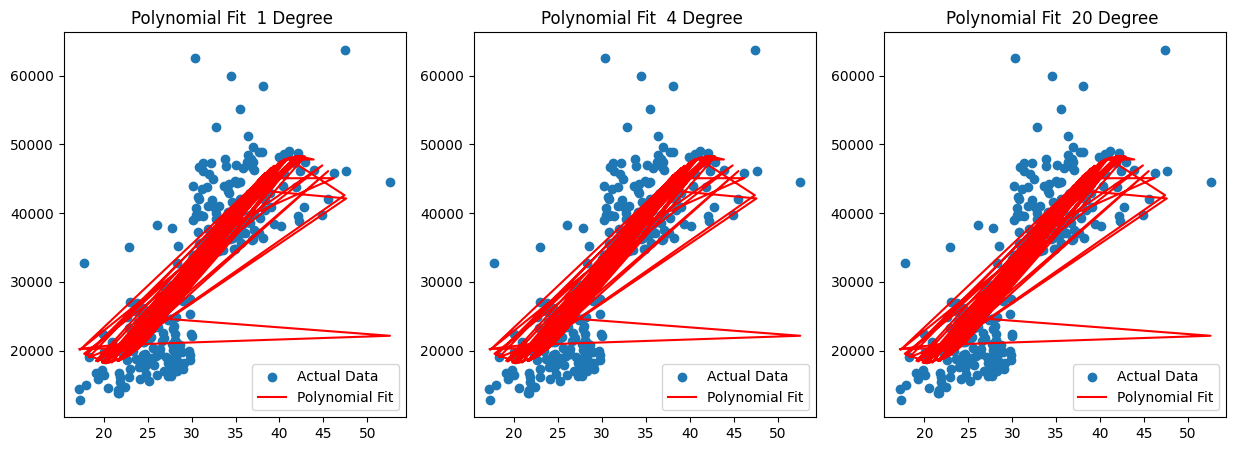

In [125]:

degrees_to_plot = [1, 4, 20]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Create a subplot
#fig, axs[i] = plt.subplots(1, 3, 1)
for i, degree in enumerate(degrees_to_plot):
    # Create Polynomial Regression model
    pr = PolynomialRegression(degree=degree)

    # Split
    X_train, y_train, X_test, y_test = pr.prepare_dataset(X, y, test_size=0.2, random_state=42)

    # Train
    coeff, intercept = pr.train(X_train, y_train)

    # Generate polynomial features for both train and test sets
    X_poly_train = pr.generate_polynomial_features(X_train, degree)
    X_poly_test = pr.generate_polynomial_features(X_test, degree)

    # Predictions
    y_train_pred = np.dot(X_poly_train, coeff) + intercept
    y_test_pred = np.dot(X_poly_test, coeff) + intercept

    # Compute loss
    train_loss = pr.compute_loss(y_train_pred, y_train, loss_fn='R2_Score')
    test_loss = pr.compute_loss(y_test_pred, y_test, loss_fn='R2_Score')

    # Plotting
    axs[i].scatter(X, y, label='Actual Data')
    axs[i].plot(X, np.dot(pr.generate_polynomial_features(X, degree), coeff) + intercept, color='red', label='Polynomial Fit')
    axs[i].set_title(f'Polynomial Fit  {degree} Degree ')
    axs[i].legend()

    print(f"Degree {degree} - Train Loss: {train_loss:.2f}, Test Loss: {test_loss:.2f}")
plt.show()


# Submission

Please read the notes here carefully:

    The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

    The file you upload must be named as [Student ID]-[Your name].zip and it must contain only 1 file:

    Linear_and_Logistic_Regression.ipynb

    Important Note: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that

In case you have any questions, contact @Taraa_brn or @Haanieh97.
